<a href="https://colab.research.google.com/github/rkaur050/logistic-regression/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Binary Classification (logistic regression)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Problem : Student Exam Result Prediction using logistic regression


*   We have data that includes the number of hours students studied and the number of hours they slept the night before an exam.

*   Each student either passed or failed the exam, which is represented by a binary target variable (1 for passed, 0 for failed).

In [ ]:
X_train = np.array([[2, 8], [4, 7], [5, 6], [6, 5], [7, 3],
                    [3, 8], [2, 6], [8, 2], [7, 6], [9, 4],
                    [10, 3], [1, 10], [3, 5], [6, 8], [7, 5]])

y_train = np.array([0, 0, 1, 1, 1,
                    0, 0, 1, 1, 1,
                    1, 0, 0, 1, 1])

### Defining sigmoid function

*  The sigmoid function maps any real number to a value between 0 and 1, which will be interpreted as the probability that the target is 1.




In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

### Setting up Cost Function

In [ ]:
def compute_cost(X,y,w,b):
  m=len(y)
  z=np.dot(X,w)+b
  f=sigmoid(z)
  cost=-(1/m)*np.sum((y*np.log(f))+(1-y)*np.log(1-f))
  return cost

### Implementing Gradient Descent

In [ ]:
def gradient_descent(X,y,w,b,alpha,num_itrs):
  m=len(y)
  for i in range(num_itrs):
    z=np.dot(X,w)+b
    f=sigmoid(z)

    dj_dw=(1/m)*(np.dot(X.T,f-y))
    dj_db=(1/m)*np.sum(f-y)

    w=w-alpha*dj_dw
    b=b-alpha*dj_db

    cost=compute_cost(X,y,w,b)

    if i%100==0:
      print(f"For iteration:{i}\nCost:{cost}\nw:{w} b:{b}\n")
  return w,b


In [ ]:
w=np.zeros(X_train.shape[1])
b=0
alpha=0.01
num_itrs=1000
w,b=gradient_descent(X_train,y_train,w,b,alpha,num_itrs)

For iteration:0
Cost:0.6789577483616788
w:[ 0.012 -0.001] b:0.001

For iteration:100
Cost:0.3029107437433282
w:[ 0.49666194 -0.32174189] b:0.013606732421906454

For iteration:200
Cost:0.22504329249021363
w:[ 0.720936   -0.48385023] b:0.017898661976446954

For iteration:300
Cost:0.18845899426812643
w:[ 0.87588873 -0.5950741 ] b:0.021060292070999964

For iteration:400
Cost:0.16580167636006427
w:[ 0.99810567 -0.68260898] b:0.023680100815684915

For iteration:500
Cost:0.1497709679327561
w:[ 1.10103073 -0.75618854] b:0.025976563375966804

For iteration:600
Cost:0.13752286325047053
w:[ 1.19107787 -0.82043772] b:0.028051797849322883

For iteration:700
Cost:0.12769160319665662
w:[ 1.2718152  -0.87793389] b:0.02996184394172489

For iteration:800
Cost:0.11952727550377835
w:[ 1.34544032 -0.93026925] b:0.031741152325870464

For iteration:900
Cost:0.11257775550971233
w:[ 1.41340878 -0.97850146] b:0.03341273531141694



### Making Predictions

In [ ]:
def predict(X,w,b):
  z=np.dot(X,w)+b
  chances=sigmoid(z)
  return chances>=0.5

In [ ]:
newData=np.array([[6,5],[3,4],[2,7],[6,7],[4,7]])
output=predict(newData,w,b)
i=0
for res in output:
  print(f"{'Passed' if res else 'Failed'}")
  i=i+1

Passed
Passed
Failed
Passed
Failed


### Visualizing the Results & Decision Boundary


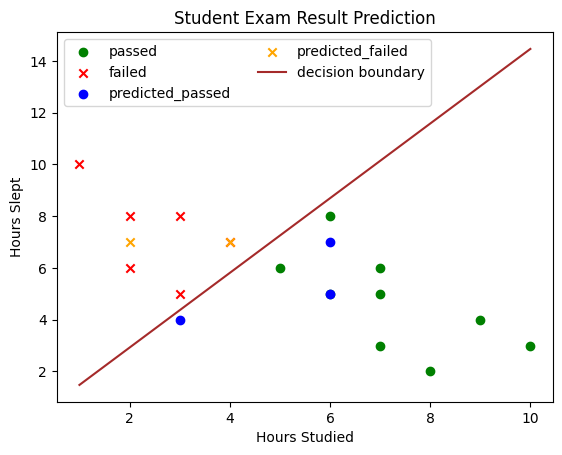

In [ ]:
passed=X_train[y_train==1]
failed=X_train[y_train==0]

predicted_passed=newData[output==1]
predicted_failed=newData[output==0]

plt.scatter(passed[:,0],passed[:,1],c='green',marker='o',label='passed')
plt.scatter(failed[:,0],failed[:,1],c='red',marker='x',label='failed')
plt.scatter(predicted_passed[:,0],predicted_passed[:,1],c='blue',marker='o',label='predicted_passed')
plt.scatter(predicted_failed[:,0],predicted_failed[:,1],c='orange',marker='x',label='predicted_failed')

x_values=np.array([np.min(X_train[:,0]),np.max(X_train[:,1])])
y_values=-(w[0]*x_values+b)/w[1]

plt.plot(x_values,y_values,c='brown',label='decision boundary')

plt.xlabel('Hours Studied')
plt.ylabel('Hours Slept')
plt.title('Student Exam Result Prediction')
plt.legend(ncol=2)
plt.show()